In [180]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [181]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

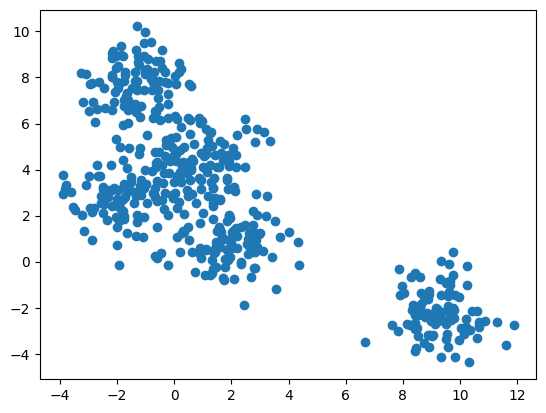

In [182]:
plt.scatter(X, Y)

In [183]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [184]:
def Distance(P1, P2):
    ### Enter Code to find distance between 2 points
    return ((P1.x-P2.x)**2 + (P1.y-P2.y)**2)**0.5

def Mean(AP):
    ### Write code to find centroid of an group of points
    cx = sum(point.x for point in AP) / len(AP) if len(AP) != 0 else 0
    cy = sum(point.y for point in AP) / len(AP) if len(AP) != 0 else 0
    centroid = Point(cx, cy)
    return centroid

In [185]:
def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP
    minD = Distance(P, AP[0])
    minId = 0
    for i in range(1, len(AP)):
        if Distance(P, AP[i]) < minD:
            minD = Distance(P, AP[i])
            minId = i

    return AP[minId]

In [186]:
def equality(A1, A2):
    ### Check if A1 and A2 arrays are same or not(same values)
    ans=True
    for i in range (0,len(A1)):
        if A1[i].x!=A2[i].x or A1[i].y!=A2[i].y:
            ans=False
    if len(A1)!=len(A2):
        ans=False
    return ans

In [187]:
def kMeans(X, Y, k):
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}
    randomIds = np.random.randint(0, len(X), k)
    kMi = []
    for index in randomIds:
        kMi.append(Point(X[index], Y[index]))
    kM = kMi
    while True:
        D = dict()  # Dictionary
        for centroid in kM:
            D[centroid] = list()
        for i in range(len(X)):
            point = Point(X[i], Y[i])
            D[MinPoint(point, kM)].append(point)
        temp_centroid_list = list()
        for i, centroid in enumerate(kM):
            temp_centroid_list.append(Mean(D[centroid]))
        if(equality(kM, temp_centroid_list)):
            break
        else:
            kM = temp_centroid_list 
    return [kM, kMi, D]

In [191]:
# Function to calculate the sum of squared distances to the nearest centroid
def calculate_SSD(points, centroids, clusters):
    ssd = 0
    for centroid, group in clusters.items():
        for point in group:
            ssd += Distance(point, centroid)**2
    return ssd

# Elbow method to determine the optimal k
def Elbow(X, Y):
    points = [Point(x, y) for x, y in zip(X, Y)]
    ssd_values = []
    k_values = range(1, 21)

    for k in k_values:
        kM, kMi, D = kMeans(X, Y, k)
        ssd = calculate_SSD(points, kM, D)
        ssd_values.append(ssd)
    
    # Plotting the Elbow curve
    plt.plot(k_values, ssd_values, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.title('Elbow Method for Optimal k')
    plt.show()
    return ssd_values

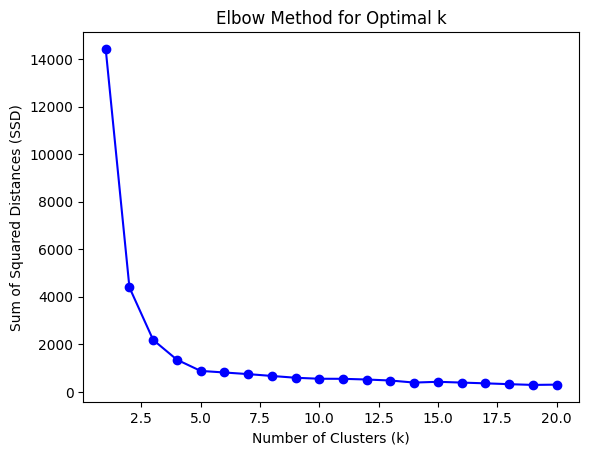

SSD values for different k: [14423.995571116931, 4390.702977889528, 2183.1288051012766, 1351.656653132091, 879.9759321764258, 813.4460689188777, 745.4010003142741, 667.5394607110418, 592.0724350144317, 550.0442735914825, 547.3932484222775, 517.8037620863162, 475.7057232707424, 388.9139517118887, 421.98736317296425, 388.70098965630064, 356.6929782066725, 322.0571032490191, 290.27766667174495, 302.34951874616706]


In [192]:
### Here, plot the elbow curve
ssd_values = Elbow(X, Y)
print("SSD values for different k:", ssd_values)

/var/folders/g5/b9cy28ks44x_v0t6r5r41ptw0000gn/T/ipykernel_65011/1510101040.py:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroid.x, centroid.y, color=final_centroid_color, marker='x', s=200, edgecolor='k', label=f'Final Centroid {i+1}')


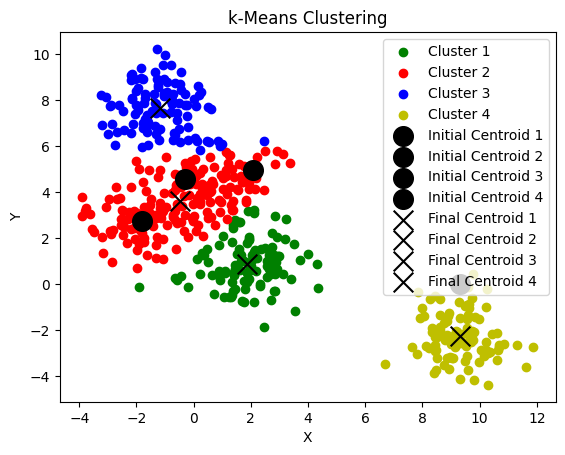

In [203]:
### Here, plot the scatter plot with each point colour coded with the respective groups. And, with initial k centroids, and final k centroids
k = 4
kM, kMi, D = kMeans(X, Y, k)
colors = ['g', 'r', 'b', 'y']
for i, (centroid, points) in enumerate(D.items()):
    plt.scatter([p.x for p in points], [p.y for p in points], color=colors[i % len(colors)], label=f'Cluster {i+1}')
initial_centroid_color = 'black'
for i, centroid in enumerate(kMi):
    plt.scatter(centroid.x, centroid.y, color=initial_centroid_color, marker='o', s=200, edgecolor='k', label=f'Initial Centroid {i+1}')
final_centroid_color = 'black'
for i, centroid in enumerate(kM):
    plt.scatter(centroid.x, centroid.y, color=final_centroid_color, marker='x', s=200, edgecolor='k', label=f'Final Centroid {i+1}')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("k-Means Clustering")
plt.legend()
plt.show()